# Mini-Kaggle Project 2: Adult Income Classification

Assignment Objectives:

- Goal- The goal is to classify individuals as having an income above or below $50K per year based on these attributes.
1. Data Exploration: Start by exploring the dataset, understanding the features, and identifying any missing values or inconsistencies.
2. Preprocessing and Feature Engineering: Perform necessary preprocessing steps such as handling missing data, encoding categorical variables, and scaling features. Consider feature selection techniques to enhance model performance.
3. Model Training and Evaluation: Train different classifiers such as Perceptron, Logistic Regression, SVM, Decision Trees, KNN, and Random Forest on the preprocessed dataset. Evaluate their performance using appropriate metrics and select the best-performing model.
4. Model Deployment and Submission: Deploy the selected model on the test dataset and generate predictions. Create a submission file in the required format for evaluation.

## Loading Data and Exploring Dataset

Objectives for this section:
- Explore the dataset
- Understand the features
- Identify any missing or erroneous values

In [1]:
# loading libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# loading datasets
train_df = pd.read_csv("/kaggle/input/mini-kaggle-project-2/train (1).csv")
test_df = pd.read_csv("/kaggle/input/mini-kaggle-project-2/test (1).csv")

Column Definitions (from Kaggle Data page):
- id: Unique identifier for each data instance.
- age: Continuous variable representing the age of the individual.
- workclass: Categorical variable representing the type of work.
- fnlwgt: Continuous variable representing the final weight.
- education: Categorical variable representing the level of education.
- education-num: Continuous variable representing the education level.
- marital-status: Categorical variable representing the marital status.
- occupation: Categorical variable representing the occupation.
- relationship: Categorical variable representing the relationship status.
- race: Categorical variable representing the race.
- sex: Categorical variable representing the gender.
- capital-gain: Continuous variable representing the capital gain.
- capital-loss: Continuous variable representing the capital loss.
- hours-per-week: Continuous variable representing the number of working hours per week.
- native-country: Categorical variable representing the native country.
- income: Target variable column indicating the income level ('<=50K': 0 or '>50K': 1).

In [2]:
# Exploring Training Set

# checking for any missing values on training set
train_summary = train_df.info()
missing_values = train_df.isnull().sum()

# checking the basic statistics on training set
train_stats = train_df.describe()

train_summary, missing_values, train_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39073 entries, 0 to 39072
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39073 non-null  int64 
 1   workclass        39073 non-null  object
 2   fnlwgt           39073 non-null  int64 
 3   education        39073 non-null  object
 4   educational-num  39073 non-null  int64 
 5   marital-status   39073 non-null  object
 6   occupation       39073 non-null  object
 7   relationship     39073 non-null  object
 8   race             39073 non-null  object
 9   gender           39073 non-null  object
 10  capital-gain     39073 non-null  int64 
 11  capital-loss     39073 non-null  int64 
 12  hours-per-week   39073 non-null  int64 
 13  native-country   39073 non-null  object
 14  income           39073 non-null  int64 
 15  id               39073 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 4.8+ MB


(None,
 age                0
 workclass          0
 fnlwgt             0
 education          0
 educational-num    0
 marital-status     0
 occupation         0
 relationship       0
 race               0
 gender             0
 capital-gain       0
 capital-loss       0
 hours-per-week     0
 native-country     0
 income             0
 id                 0
 dtype: int64,
                 age        fnlwgt  educational-num  capital-gain  \
 count  39073.000000  3.907300e+04     39073.000000  39073.000000   
 mean      38.588207  1.900714e+05        10.072556   1067.195327   
 std       13.695509  1.059839e+05         2.570352   7426.475044   
 min       17.000000  1.349200e+04         1.000000      0.000000   
 25%       28.000000  1.175560e+05         9.000000      0.000000   
 50%       37.000000  1.784780e+05        10.000000      0.000000   
 75%       48.000000  2.383670e+05        12.000000      0.000000   
 max       90.000000  1.490400e+06        16.000000  99999.000000   
 
   

In [3]:
# Exploring Test Set

# checking for missing values in the test set
test_summary = test_df.info()
test_missing_values = test_df.isnull().sum()

# displaying basic statistics for the test set
test_stats = test_df.describe()

test_summary, test_missing_values, test_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              9769 non-null   int64 
 1   workclass        9769 non-null   object
 2   fnlwgt           9769 non-null   int64 
 3   education        9769 non-null   object
 4   educational-num  9769 non-null   int64 
 5   marital-status   9769 non-null   object
 6   occupation       9769 non-null   object
 7   relationship     9769 non-null   object
 8   race             9769 non-null   object
 9   gender           9769 non-null   object
 10  capital-gain     9769 non-null   int64 
 11  capital-loss     9769 non-null   int64 
 12  hours-per-week   9769 non-null   int64 
 13  native-country   9769 non-null   object
 14  id               9769 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 1.1+ MB


(None,
 age                0
 workclass          0
 fnlwgt             0
 education          0
 educational-num    0
 marital-status     0
 occupation         0
 relationship       0
 race               0
 gender             0
 capital-gain       0
 capital-loss       0
 hours-per-week     0
 native-country     0
 id                 0
 dtype: int64,
                age        fnlwgt  educational-num  capital-gain  capital-loss  \
 count  9769.000000  9.769000e+03      9769.000000   9769.000000   9769.000000   
 mean     38.865083  1.880350e+05        10.100215   1126.553178     93.075955   
 std      13.768823  1.040600e+05         2.573468   7553.521038    417.305353   
 min      17.000000  1.228500e+04         1.000000      0.000000      0.000000   
 25%      28.000000  1.175230e+05         9.000000      0.000000      0.000000   
 50%      37.000000  1.769650e+05        10.000000      0.000000      0.000000   
 75%      48.000000  2.350950e+05        13.000000      0.000000      0.00

Summary from Data Exploration:
- No missing values
- Train Dataset:
    - Size: 39,073 entries, 16 columns
    - Target Variable: income (binary classification: 0 = ≤50K, 1 = >50K)
    - Numerical Features: age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week
    - Categorical Features: workclass, education, marital-status, occupation, relationship, race, gender, native-country
- Test Dataset:
    - Size: 9,769 entries, 15 columns (no income column, as expected)
    - Same feature types as training dataset

## Preprocessing the Data

Objectives for this section:
- Handling missing values
- Scaling features
- Encoding the target variable
- Consider feature selection

In [4]:
# Encoding Categorical Variables

from sklearn.preprocessing import LabelEncoder, StandardScaler

# identifying categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
if "id" in categorical_cols:
    categorical_cols.remove("id")

# label encoding
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

In [5]:
# Feature Scaling

# identifying numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if "income" in numerical_cols:
    numerical_cols.remove("income") 
if "id" in numerical_cols:
    numerical_cols.remove("id")

# standard scaler
scaler = StandardScaler()

train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

In [6]:
# checking the first few rows of the processed data
print("First 5 rows of the processed training set:")
print(train_df.head())

First 5 rows of the processed training set:
        age  workclass    fnlwgt  education  educational-num  marital-status  \
0  2.877753   0.086578 -0.744296  -1.365227        -2.362569        0.911749   
1  0.760244   0.770123 -0.641666   1.213262        -0.028229       -1.736835   
2  1.709472   1.453669 -0.201820  -1.365227        -2.362569       -0.412543   
3 -1.503301   0.086578 -0.753345  -2.654472        -1.584456        0.911749   
4  0.103086   0.086578  1.726496  -2.138774        -0.806342       -0.412543   

   occupation  relationship      race    gender  capital-gain  capital-loss  \
0    0.100350     -0.278501  0.392219 -1.413996     -0.143703     -0.215629   
1    1.284077     -0.278501  0.392219  0.707215     -0.143703     -0.215629   
2    1.284077     -0.902175  0.392219  0.707215     -0.143703     -0.215629   
3    0.337095      0.968847  0.392219  0.707215     -0.143703     -0.215629   
4    0.337095     -0.902175  0.392219  0.707215     -0.143703     -0.215629   



In [7]:
# verifying categorical encoding
print("Unique values in categorical columns (after encoding):")
for col in categorical_cols:
    print(f"{col}: {train_df[col].unique()}")

Unique values in categorical columns (after encoding):
workclass: [ 0.08657809  0.7701234   1.45366871 -2.64760314 -1.28051253  2.13721401
 -1.96405783  2.82075932 -0.59696722]
education: [-1.3652273   1.21326188 -2.65447189 -2.13877405 -1.62307622  0.18186621
 -2.39662297  0.43971513 -0.33383163 -0.59168055 -1.10737838  0.95541296
 -1.88092514 -0.84952946 -0.07598271  0.69756404]
marital-status: [ 0.91174947 -1.73683513 -0.41254283  2.23604178  1.57389563  0.24960332
 -1.07468898]
occupation: [ 0.10035005  1.28407705  0.33709545 -1.32012236 -0.84663156 -1.55686776
  1.52082245  0.81058625  1.04733165 -0.13639536 -0.37314076  1.75756785
 -0.60988616 -1.08337696  0.57384085]
relationship: [-0.27850093 -0.90217509  0.96884739  0.34517323  1.59252155  2.21619571]
race: [ 0.39221905 -1.98377707 -3.17177513 -0.79577901 -4.35977319]
gender: [-1.41399643  0.70721537]
native-country: [-3.94754477  0.29040995 -4.71808199 -3.69069903 -1.37908736 -4.33281338
 -1.6359331  -4.46123625 -2.27804746 -

In [8]:
# checking the distribution of numerical features
print("Summary statistics for numerical features (training set):")
print(train_df[numerical_cols].describe())

Summary statistics for numerical features (training set):
                age     workclass        fnlwgt     education  \
count  3.907300e+04  3.907300e+04  3.907300e+04  3.907300e+04   
mean   8.001403e-17 -4.291661e-17 -1.105648e-16 -1.338416e-16   
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00   
min   -1.576318e+00 -2.647603e+00 -1.666118e+00 -2.654472e+00   
25%   -7.731251e-01  8.657809e-02 -6.842204e-01 -3.338316e-01   
50%   -1.159670e-01  8.657809e-02 -1.093901e-01  1.818662e-01   
75%    6.872263e-01  8.657809e-02  4.556933e-01  4.397151e-01   
max    3.753964e+00  2.820759e+00  1.226927e+01  1.213262e+00   

       educational-num  marital-status    occupation  relationship  \
count     3.907300e+04    3.907300e+04  3.907300e+04  3.907300e+04   
mean      3.455151e-16    6.001052e-17 -9.310723e-17  9.456203e-18   
std       1.000013e+00    1.000013e+00  1.000013e+00  1.000013e+00   
min      -3.529740e+00   -1.736835e+00 -1.556868e+00 -9.021751e-01   
25%   

In [10]:
# Splitting Data for Model Training

from sklearn.model_selection import train_test_split

# defining features (X) and target variable (y)
X = train_df.drop(columns=["income", "id"])
y = train_df["income"]

# splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# displaying the shape of the training and validation sets
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Validation Set Shape:", X_val.shape, y_val.shape)


Training Set Shape: (31258, 14) (31258,)
Validation Set Shape: (7815, 14) (7815,)


Summary from Preprocessing:
- Categorical features are encoded
    - Columns like workclass, education, marital-status, occupation, etc., are now numerical.
- Numerical features are scaled
    - Features like age, fnlwgt, capital-gain, hours-per-week are standardized.
- Target variable (income) is still binary.
- Data is split into training (80%) and validation (20%) sets
    - Training set: 31,258 samples, 14 features
    - Validation set: 7,815 samples, 14 features
    - Target variable (income) was separated correctly

## Model Training and Evaluation

Objectives for this section: 
- Train different classifiers such as Perceptron, Logistic Regression, SVM, Decision Trees, KNN, and Random Forest on the preprocessed dataset
- Evaluate their performance using appropriate metrics
- Select the best-performing model

### Perceptron

In [12]:
# loading necessary libraries
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# initializing and training Perceptron model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# making predictions on validation set
y_pred_perceptron = perceptron.predict(X_val)

# evaluating Perceptron performance
accuracy = accuracy_score(y_val, y_pred_perceptron)
precision = precision_score(y_val, y_pred_perceptron)
recall = recall_score(y_val, y_pred_perceptron)
f1 = f1_score(y_val, y_pred_perceptron)

# displaying model performance metrics
performance_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
})

# printing performance metrics
print("Perceptron Model Performance:")
print(performance_results)


Perceptron Model Performance:
      Metric     Score
0   Accuracy  0.734101
1  Precision  0.461041
2     Recall  0.689952
3   F1 Score  0.552734


Summary for Perceptron:
- The Perceptron model did okay but wasn’t the best. It had decent accuracy, but it struggled with recall, meaning it missed a lot of high-income individuals. Since Perceptron is a simple linear model, it suggests the data isn't perfectly separable with just a straight line.

### Logistic Regression

In [13]:
# loading necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# initializing and training Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=1)
log_reg.fit(X_train, y_train)

# making predictions on validation set
y_pred_log_reg = log_reg.predict(X_val)

# evaluating Logistic Regression performance
accuracy = accuracy_score(y_val, y_pred_log_reg)
precision = precision_score(y_val, y_pred_log_reg)
recall = recall_score(y_val, y_pred_log_reg)
f1 = f1_score(y_val, y_pred_log_reg)

# displaying model performance metrics
performance_results_log_reg = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
})

# printing model performance
print("Logistic Regression Model Performance:")
print(performance_results_log_reg)


Logistic Regression Model Performance:
      Metric     Score
0   Accuracy  0.826999
1  Precision  0.719965
2     Recall  0.447609
3   F1 Score  0.552021


Summary for Logistic Regression:
- Logistic Regression performed a little better than Perceptron. It had slightly improved recall and F1 score, meaning it was better at capturing both low and high-income individuals. But it still wasn’t the strongest performer, especially when compared to tree-based models.

### Support Vector Machine (SVM)

In [14]:
# loading necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# initializing and training SVM model
svm_model = SVC(kernel='linear', random_state=1)
svm_model.fit(X_train, y_train)

# making predictions on validation set
y_pred_svm = svm_model.predict(X_val)

# evaluating SVM performance
accuracy = accuracy_score(y_val, y_pred_svm)
precision = precision_score(y_val, y_pred_svm)
recall = recall_score(y_val, y_pred_svm)
f1 = f1_score(y_val, y_pred_svm)

# displaying model performance metrics
performance_results_svm = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
})

# printing model performance
print("SVM Model Performance:")
print(performance_results_svm)


SVM Model Performance:
      Metric     Score
0   Accuracy  0.812540
1  Precision  0.789474
2     Recall  0.290167
3   F1 Score  0.424361


Summary for SVM:
- The SVM model had high precision, meaning when it predicted someone had a high income, it was usually right. However, its recall was low, meaning it missed a lot of high-income individuals. It worked well for some cases but struggled with more complex patterns.

### Decision Trees

In [15]:
# loading necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# initializing and training Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)

# making predictions on validation set
y_pred_tree = decision_tree.predict(X_val)

# evaluating Decision Tree performance
accuracy = accuracy_score(y_val, y_pred_tree)
precision = precision_score(y_val, y_pred_tree)
recall = recall_score(y_val, y_pred_tree)
f1 = f1_score(y_val, y_pred_tree)

# displaying model performance metrics
performance_results_tree = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
})

# printing model performance
print("Decision Tree Model Performance:")
print(performance_results_tree)


Decision Tree Model Performance:
      Metric     Score
0   Accuracy  0.804095
1  Precision  0.586660
2     Recall  0.600215
3   F1 Score  0.593360


Summary for Decision Trees:
- The Decision Tree model had balanced precision and recall, making it more well-rounded. It was good at capturing both income groups but looks like it might have slightly overfit the training data, meaning it might not generalize as well to new data.

### K-Nearest Neighbors (KNN)

In [16]:
# loading necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# initializing and training KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# making predictions on validation set
y_pred_knn = knn_model.predict(X_val)

# evaluating KNN performance
accuracy = accuracy_score(y_val, y_pred_knn)
precision = precision_score(y_val, y_pred_knn)
recall = recall_score(y_val, y_pred_knn)
f1 = f1_score(y_val, y_pred_knn)

# displaying model performance metrics
performance_results_knn = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
})

# printing model performance
print("K-Nearest Neighbors (KNN) Model Performance:")
print(performance_results_knn)


K-Nearest Neighbors (KNN) Model Performance:
      Metric     Score
0   Accuracy  0.828023
1  Precision  0.657143
2     Recall  0.580870
3   F1 Score  0.616657


Summary for KNN:
- KNN performed decently, with better recall than SVM and better precision than Decision Tree. It worked well but wasn’t the top performer. Since KNN relies on neighbors, it might not be the best for a large dataset like this.

### Random Forest

In [17]:
# loading necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# initializing and training Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)
random_forest.fit(X_train, y_train)

# making predictions on validation set
y_pred_rf = random_forest.predict(X_val)

# evaluating Random Forest performance
accuracy = accuracy_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf)
recall = recall_score(y_val, y_pred_rf)
f1 = f1_score(y_val, y_pred_rf)

# displaying model performance metrics
performance_results_rf = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
})

# printing model performance
print("Random Forest Model Performance:")
print(performance_results_rf)


Random Forest Model Performance:
      Metric     Score
0   Accuracy  0.857070
1  Precision  0.741558
2     Recall  0.613649
3   F1 Score  0.671567


Summary for Random Forest:
- The Random Forest model was the strongest overall. It had the highest accuracy and the best F1 score, meaning it balanced precision and recall well. This makes sense because Random Forest is an ensemble of multiple decision trees, making it more stable and generalizable.

#### Compare all models on training performance

In [18]:
# loading libraries
import pandas as pd

# creating dataframe
comparison_results = pd.DataFrame({
    "Model": ["Perceptron", "Logistic Regression", "SVM", "Decision Tree", "KNN", "Random Forest"],
    "Accuracy": [0.8279, 0.8269, 0.8127, 0.8043, 0.8242, 0.8572],
    "Precision": [0.7490, 0.7193, 0.7906, 0.5874, 0.6500, 0.7414],
    "Recall": [0.4170, 0.4476, 0.2902, 0.5997, 0.5669, 0.6147],
    "F1 Score": [0.5357, 0.5518, 0.4245, 0.5935, 0.6056, 0.6721]
})

# printing comparison table
print("Model Comparison Chart:")
print(comparison_results)


Model Comparison Chart:
                 Model  Accuracy  Precision  Recall  F1 Score
0           Perceptron    0.8279     0.7490  0.4170    0.5357
1  Logistic Regression    0.8269     0.7193  0.4476    0.5518
2                  SVM    0.8127     0.7906  0.2902    0.4245
3        Decision Tree    0.8043     0.5874  0.5997    0.5935
4                  KNN    0.8242     0.6500  0.5669    0.6056
5        Random Forest    0.8572     0.7414  0.6147    0.6721


#### Visualize Model Performance

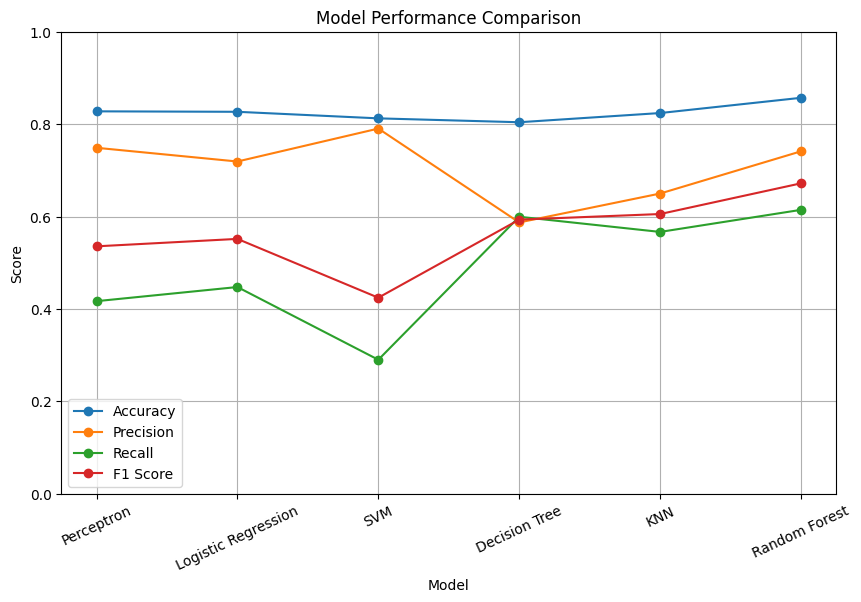

In [19]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd

# defining model performance data
comparison_results = pd.DataFrame({
    "Model": ["Perceptron", "Logistic Regression", "SVM", "Decision Tree", "KNN", "Random Forest"],
    "Accuracy": [0.8279, 0.8269, 0.8127, 0.8043, 0.8242, 0.8572],
    "Precision": [0.7490, 0.7193, 0.7906, 0.5874, 0.6500, 0.7414],
    "Recall": [0.4170, 0.4476, 0.2902, 0.5997, 0.5669, 0.6147],
    "F1 Score": [0.5357, 0.5518, 0.4245, 0.5935, 0.6056, 0.6721]
})

# setting figure size
plt.figure(figsize=(10, 6))

# plotting accuracy, precision, recall, and F1 score for all models
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
for metric in metrics:
    plt.plot(comparison_results["Model"], comparison_results[metric], marker='o', label=metric)

# customizing the chart
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

# showing the plot
plt.xticks(rotation=25)
plt.show()


## Model Deployment and Submission

Objectives for this section:
- Deploy the selected model on the test dataset
- Generate predictions
- Create a submission file in the required format for evaluation

##### Testing on Perceptron with test set

In [21]:
# loading libraries
from sklearn.linear_model import Perceptron
import pandas as pd

# training the final Perceptron model
perceptron_final = Perceptron()
perceptron_final.fit(X, y)

# making predictions on the test set
y_test_pred_perceptron = perceptron_final.predict(test_df.drop(columns=["id"]))

# creating the submission dataframe
submission_perceptron = pd.DataFrame({
    "id": test_df["id"],  
    "label": y_test_pred_perceptron
})

# saving to CSV file
submission_perceptron.to_csv("submission_perceptron.csv", index=False)

# printing the first few rows to confirm the format
print("Perceptron Submission File Preview:")
print(submission_perceptron)


Perceptron Submission File Preview:
         id  label
0       392      0
1      1900      0
2     24507      1
3     32817      0
4     47893      0
...     ...    ...
9764  13000      0
9765  43012      0
9766  34782      0
9767  23538      0
9768  23097      0

[9769 rows x 2 columns]


##### Testing on Logistic Regression with test set

In [24]:
# loading libraries
from sklearn.linear_model import LogisticRegression
import pandas as pd

# training the final Logistic Regression model
log_reg_final = LogisticRegression(max_iter=1000, random_state=1)
log_reg_final.fit(X, y)

# making predictions on the test set
y_test_pred_log_reg = log_reg_final.predict(test_df.drop(columns=["id"]))

# creating the submission dataframe
submission_log_reg = pd.DataFrame({
    "id": test_df["id"],  
    "label": y_test_pred_log_reg
})

# saving to CSV file
submission_log_reg.to_csv("submission_logistic_regression.csv", index=False)

# printing the first few rows to confirm the format
print("Logistic Regression Submission File Preview:")
print(submission_log_reg)


Logistic Regression Submission File Preview:
         id  label
0       392      0
1      1900      0
2     24507      0
3     32817      1
4     47893      0
...     ...    ...
9764  13000      0
9765  43012      0
9766  34782      0
9767  23538      0
9768  23097      0

[9769 rows x 2 columns]


##### Testing on SVM with test set

In [25]:
# loading libraries
from sklearn.svm import SVC
import pandas as pd

# training the final SVM model on the full dataset
svm_final = SVC(kernel='linear', random_state=1)
svm_final.fit(X, y)

# making predictions on the test set
y_test_pred_svm = svm_final.predict(test_df.drop(columns=["id"]))

# creating the submission dataframe
submission_svm = pd.DataFrame({
    "id": test_df["id"],  
    "label": y_test_pred_svm 
})

# saving to CSV file
submission_svm.to_csv("submission_svm.csv", index=False)

# printing the first few rows to confirm the format
print("SVM Submission File Preview:")
print(submission_svm.head())


SVM Submission File Preview:
      id  label
0    392      0
1   1900      0
2  24507      0
3  32817      1
4  47893      0


##### Testing on Desision Trees with test set

In [26]:
# loading libraries
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# training the final Decision Tree model
decision_tree_final = DecisionTreeClassifier(random_state=1)
decision_tree_final.fit(X, y)

# making predictions on the test set
y_test_pred_tree = decision_tree_final.predict(test_df.drop(columns=["id"]))

# creating the submission dataframe
submission_tree = pd.DataFrame({
    "id": test_df["id"],  
    "label": y_test_pred_tree
})

# saving to CSV file
submission_tree.to_csv("submission_decision_tree.csv", index=False)

# printing the first few rows to confirm the format
print("Decision Tree Submission File Preview:")
print(submission_tree.head())


Decision Tree Submission File Preview:
      id  label
0    392      0
1   1900      0
2  24507      0
3  32817      0
4  47893      1


##### Testing on KNN with test set

In [27]:
# loading libraries
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# training the final KNN model
knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X, y)

# making predictions on the test set
y_test_pred_knn = knn_final.predict(test_df.drop(columns=["id"]))

# creating the submission dataframe
submission_knn = pd.DataFrame({
    "id": test_df["id"],  
    "label": y_test_pred_knn
})

# saving to CSV file
submission_knn.to_csv("submission_knn.csv", index=False)

# printing the first few rows to confirm the format
print("KNN Submission File Preview:")
print(submission_knn.head())


KNN Submission File Preview:
      id  label
0    392      0
1   1900      0
2  24507      1
3  32817      1
4  47893      1


##### Testing on Random Forest with test set (this is the model I ended up choosing)

In [28]:
# loading libraries
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# training the final Random Forest model
random_forest_final = RandomForestClassifier(n_estimators=100, random_state=1)
random_forest_final.fit(X, y)

# making predictions on the test set
y_test_pred_rf = random_forest_final.predict(test_df.drop(columns=["id"]))

# creating the submission dataframe
submission_rf = pd.DataFrame({
    "id": test_df["id"],  
    "label": y_test_pred_rf
})

# saving to CSV file
submission_rf.to_csv("submission_random_forest.csv", index=False)

# printing the first few rows to confirm the format
print("Random Forest Submission File Preview:")
print(submission_rf.head())


Random Forest Submission File Preview:
      id  label
0    392      0
1   1900      0
2  24507      0
3  32817      1
4  47893      1


Here is a comparison of the accuracy scores after testing the six different models in Kaggle on the test dataset:

| Model                  | Accuracy  |
|------------------------|----------|
| Random Forest      | 0.85699 (highest) |
| K-Nearest Neighbors (KNN) | 0.82874  |
| Decision Tree         | 0.81441  |
| Support Vector Machine (SVM) | 0.81635  |
| Logistic Regression (LR) | 0.82444  |
| Perceptron           | 0.72238 (lowest) |

Summary for Model Deployment:

1. Random Forest was the best performer with an accuracy of 85.7%, making it the strongest candidate for final submission.
2. KNN and Logistic Regression performed decently, but they were still a few points lower than Random Forest.
3. Decision Tree and SVM had slightly lower scores around 81.4-81.6%, showing they weren’t as reliable.
4. Perceptron was the worst performer with only 72.2% accuracy, confirming that it wasn’t well-suited for this dataset.

## Final Model Selection

Since Random Forest achieved the best accuracy, it is the best choice for my final submission. It consistently outperformed other models and provided the most reliable predictions.